$\newcommand{\xbf}{{\bf x}}
\newcommand{\ybf}{{\bf y}}
\newcommand{\wbf}{{\bf w}}
\newcommand{\gbf}{{\bf g}}
\newcommand{\vbf}{{\bf v}}
\newcommand{\zbf}{{\bf z}}
\newcommand{\Ibf}{\mathbf{I}}
\newcommand{\Xbf}{\mathbf{X}}
\newcommand{\Rbb}{\mathbb{R}}
\newcommand{\vec}[1]{\left[\begin{array}{c}#1\end{array}\right]}
$

# Introduction aux réseaux de neurones : La descente de gradient
Matériel de cours rédigé par Pascal Germain, 2019
************

In [1]:
import numpy as np
import aidecours
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.datasets import make_blobs

from aidecours import code_button as CB
aidecours.center_images(); CB()

## Régression linéaire

Considérons un ensemble d'apprentissage $S=\{(\xbf_1,y_1), (\xbf_2,y_2), \ldots, (\xbf_n,y_n)\}$, 

avec $\xbf\in\Rbb^d$ et $y\in\Rbb$.

Considérons un préficteur $f_\wbf$ *linéaire* et sans biais,
$$f_\wbf({\xbf}) =  \wbf\cdot \xbf\,,$$

La minimisation de la *fonction de perte quadratique* revient à résoudre problème d'opimisation des *moindres carrés*:

$$\min_\wbf \left[\frac1n \sum_{i=1}^n (\wbf\cdot\xbf_i- y_i)^2\right].$$ 

Nous désirons trouver le minimum de la **fonction objectif** $F(\wbf)$ suivante:
$$F(\wbf) = \frac1n \sum_{i=1}^n (\wbf\cdot\xbf_i- y_i)^2.$$ 

Calculons la **dérivée partielle** de $F(\wbf)$ selon un élément $w_k$ du vecteur $\wbf$
$$\begin{align}
\frac{\partial F(\wbf)}{\partial w_k} 
&= \frac1n \sum_{i=1}^n \frac{\partial}{\partial w_k}  (\wbf\cdot\xbf_i- y_i)^2\\
&= \frac1n \sum_{i=1}^n(\wbf\cdot\xbf_i- y_i)  \frac{\partial}{\partial w_k}  (\wbf\cdot\xbf_i- y_i)\\
&= \frac1n \sum_{i=1}^n(\wbf\cdot\xbf_i- y_i)  \frac{\partial}{\partial w_k}  (w_k \, x_{i,k})\\
&= \frac1n \sum_{i=1}^n(\wbf\cdot\xbf_i- y_i)  \,x_{i,k}\,.
\end{align}$$

Le **gradient** de $F(\wbf)$, noté $\nabla F(\wbf)$, est le vecteur de toute les dérivées partielles au point $\wbf$:

$$\nabla F(\wbf) = \vec{\frac{\partial}{\partial w_1}\\ \vdots \\ \frac{\partial}{\partial w_d}}
= \frac1n \sum_{i=1}^n(\wbf\cdot\xbf_i- y_i) \, \xbf_i\,.
$$

Le minimum d'une fonction convexe est atteint lorsque $\nabla F(\wbf) = 0$.

#### Illustrons la fonction objectif pour un sensemble de donnnés tel que:
$$ 
\Xbf = \left[ \begin{array}{cc}
1& 1\\
0& -1\\
2& \frac12
\end{array} \right],
\quad\ybf = \left[ \begin{array}{c}
-1\\
3\\
2
\end{array} \right]
$$

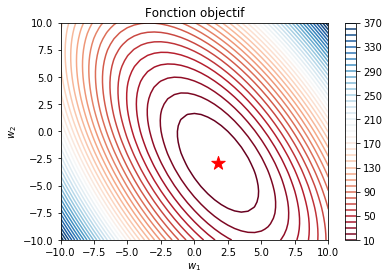

In [2]:
x = np.array([(1,1),(0,-1),(2,.5)])
y = np.array([-1,3,2])
def exemple_quad_objectif(w): return np.mean((x @ w - y) ** 2)

aidecours.show_2d_function(exemple_quad_objectif, -10, 10, .5)
w_opt = np.linalg.inv(x.T @ x) @ x.T @ y
plt.scatter(*w_opt, s=200, marker='*', c='r')
plt.title('Fonction objectif'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$'); CB()

#### Illustrons maintenant les gradients de la fonction objectif.

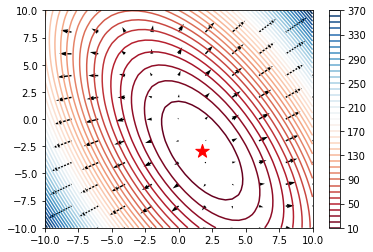

In [3]:
def exemple_quad_gradient(w): return 2*(x @ w - y) @ x / len(y)
aidecours.show_2d_vector_field(exemple_quad_gradient, -10, 10, 2)
aidecours.show_2d_function(exemple_quad_objectif, -10, 10, .5)
plt.scatter(*w_opt, s=200, marker='*', c='r'); CB()


## Descente en gradient

#### Algorithme (pour un *pas de gradient* $\eta$ et un nombre d'itérations $T$)

* Initialiser $\zbf_0 \in \Rbb^d$ aléatoirement
* Pour $t$ de $1$ à $T$:
    * $\gbf_t = \nabla F(\zbf_{t-1})$
    * $\zbf_t = \zbf_{t-1} - \eta\, \gbf_t$
    
* Retourner $\zbf_T$

### Exemple avec $\eta=0.4$ et $T=20$

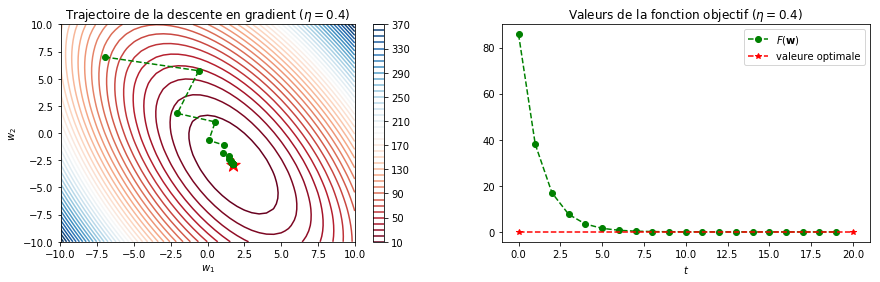

In [4]:
# Paramètres de la descente en gradient
eta = 0.4 #.1      # taille du pas
nb_iter = 20       # nombre d'itérations
w_init  = (-7,7)   # coordonnées initiales de la descente en gradient
# w_init = 20*(np.random.rand(2)-.5) # Décommenter pour initialiser aléatoirement

# Descente en gradient
def exemple_quad_descente_de_gradient(eta, nb_iter, w_init):
    w_list = np.ones((nb_iter, 2)) * np.array(w_init)
    for t in range(1, nb_iter):
        grad = exemple_quad_gradient(w_list[t-1])   # calcul du gradient
        w_list[t] = w_list[t-1] - eta*grad  # mise à jour du vecteur de poids
    return w_list

# Graphique de la trajectoire
def graph_quad_trajectoire(w_list, eta, w_opt, ax=None):
    aidecours.show_2d_function(exemple_quad_objectif, -10, 10, .5, ax=ax)
    plt.scatter(*w_opt, s=200, marker='*', c='r')
    plt.plot(w_list[:,0], w_list[:,1], 'o--', c='g')
    plt.title(f'Trajectoire de la descente en gradient ($\eta={eta}$)'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$')

# Graphique des valeurs de la fonction objectif
def graph_quad_valeurs_objectif(w_list, eta, w_opt, ax=None, label=None):
    cost_list = [exemple_quad_objectif(w) for w in w_list]
    aidecours.set_current_axes(ax)
    plt.plot(cost_list, 'o--', c='g', label='$F(\mathbf{w})$' if label is None else label)
    plt.plot([0, len(cost_list)], 2*[exemple_quad_objectif(w_opt)], '*--', c='r', label='valeure optimale'); 
    plt.title(f'Valeurs de la fonction objectif ($\eta={eta}$)'); plt.xlabel('$t$')
    plt.legend(); 

fig, axes = plt.subplots(1, 2, figsize=(14.5, 4))
w_list = exemple_quad_descente_de_gradient(eta, nb_iter, w_init)
graph_quad_trajectoire(w_list, eta, w_opt, axes[0])
graph_quad_valeurs_objectif(w_list, eta, w_opt, axes[1])
CB()

### Exemple avec $\eta=0.1$ et $T=20$

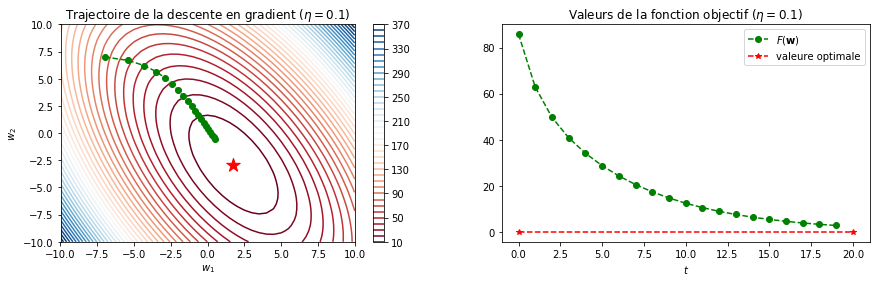

In [5]:
# Paramètres de la descente en gradient
eta = 0.1       # taille du pas
nb_iter = 20       # nombre d'itérations
w_init  = (-7,7)   # coordonnées initiales de la descente en gradient
# w_init = 20*(np.random.rand(2)-.5) # Décommenter pour initialiser aléatoirement

fig, axes = plt.subplots(1, 2, figsize=(14.5, 4))
w_list = exemple_quad_descente_de_gradient(eta, nb_iter, w_init)
graph_quad_trajectoire(w_list, eta, w_opt, axes[0])
graph_quad_valeurs_objectif(w_list, eta, w_opt, axes[1])
CB()

### Exemple avec $\eta=0.5$ et $T=20$

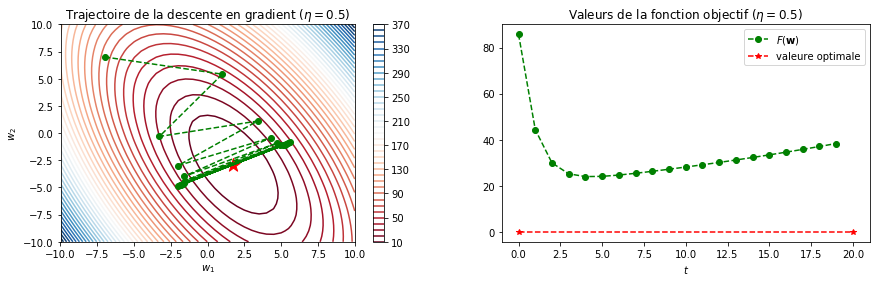

In [6]:
# Paramètres de la descente en gradient
eta = 0.5       # taille du pas
nb_iter = 20       # nombre d'itérations
w_init  = (-7,7)   # coordonnées initiales de la descente en gradient
# w_init = 20*(np.random.rand(2)-.5) # Décommenter pour initialiser aléatoirement

fig, axes = plt.subplots(1, 2, figsize=(14.5, 4))
w_list = exemple_quad_descente_de_gradient(eta, nb_iter, w_init)
graph_quad_trajectoire(w_list, eta, w_opt, axes[0])
graph_quad_valeurs_objectif(w_list, eta, w_opt, axes[1])
CB()

### Exemple avec $\eta=0.4$ et $T=20$, différentes initialisation aléatoires 

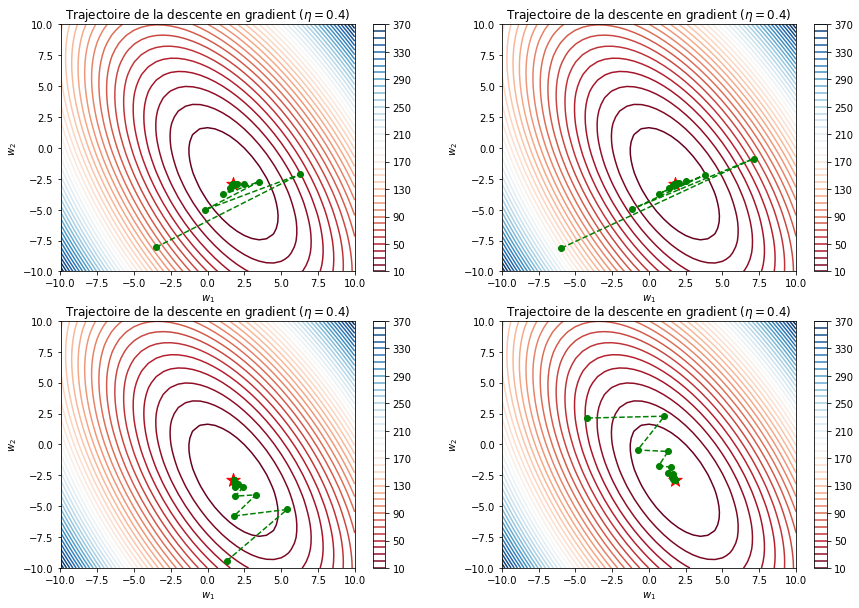

In [8]:
# Paramètres de la descente en gradient
eta = 0.4       # taille du pas
nb_iter = 20       # nombre d'itérations

fig, axes = plt.subplots(2, 2, figsize=(14.5, 10))

for ax in axes.flatten():
    w_init = 20*(np.random.rand(2)-.5) # Décommenter pour initialiser aléatoirement
    w_list = exemple_quad_descente_de_gradient(eta, nb_iter, w_init)
    graph_quad_trajectoire(w_list, eta, w_opt, ax)
CB()

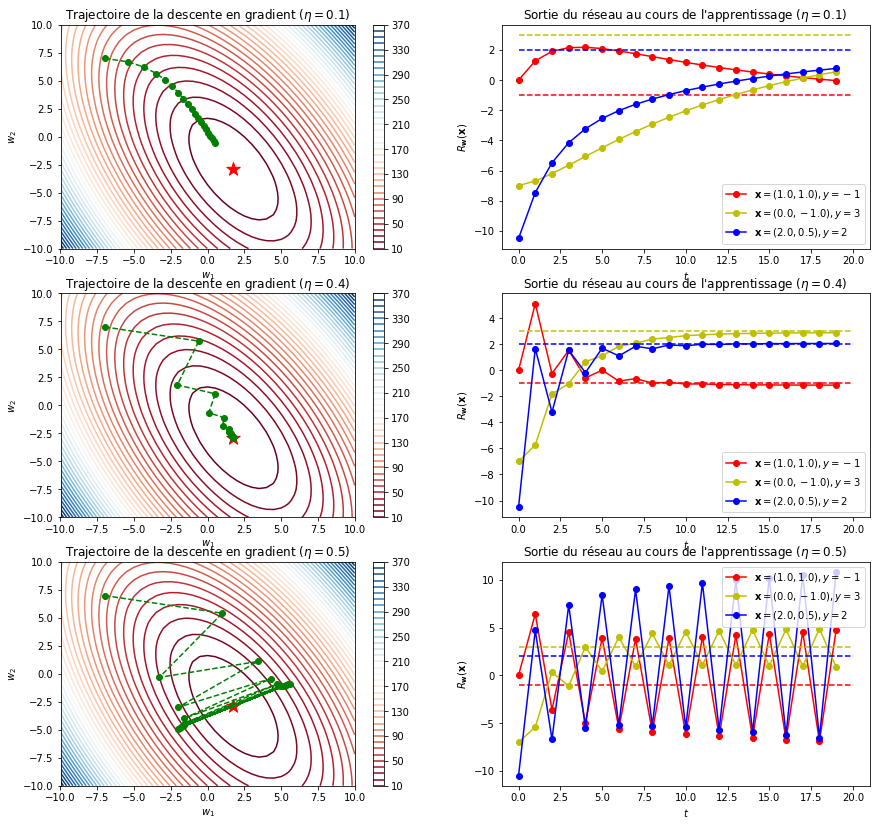

In [9]:

fig, axes = plt.subplots(3, 2, figsize=(14.5, 14))
for eta, axrow in zip([.1, .4, .5], axes):
    w_list = exemple_quad_descente_de_gradient(eta=eta, nb_iter=20, w_init=(-7,7))
    graph_quad_trajectoire(w_list, eta, w_opt, axrow[0])
    aidecours.set_current_axes(axrow[1])
    for i, c in enumerate('ryb'):
        plt.plot(w_list @ x[i,:], c+'o-', label='$\mathbf{x}'+f'=({x[i,0]}, {x[i,1]}), y={y[i]}$')
        plt.plot([0,w_list.shape[0]], [y[i]]*2, c+'--')
    plt.title(f"Sortie du réseau au cours de l'apprentissage ($\eta={eta}$)"); plt.xlabel('$t$'); plt.ylabel('$R_{\mathbf{w}}(\mathbf{x})$');
    plt.legend()
CB()

## Descente en gradient stochastique

Nous désirons trouver le minimum de la **fonction objectif** $F(\wbf)$ suivante:
$$F(\wbf) = \frac1n \sum_{i=1}^n (\wbf\cdot\xbf_i- y_i)^2 = \frac1n \sum_{i=1}^n F_i(\wbf)$$ 

avec $F_i(\wbf) = (\wbf\cdot\xbf_i- y_i)^2$ et donc $\nabla F_i(\wbf) = (\wbf\cdot\xbf_i- y_i) \, \xbf_i\,.$

#### Algorithme (pour un *pas de gradient* $\eta$ et un nombre d'itérations $T$) 

* Initialiser $\zbf_0 \in \Rbb^d$ aléatoirement
* Pour $t$ de $1$ à $T$:
    * Choisir aléatoirement $i \in \{1,\ldots, n\}$
    * $\gbf_t = \nabla F_i(\zbf_{t-1})$
    
    * $\zbf_t = \zbf_{t-1} - \dfrac{\eta}{\sqrt t}\, \gbf_t$
    
* Retourner $\zbf_T$

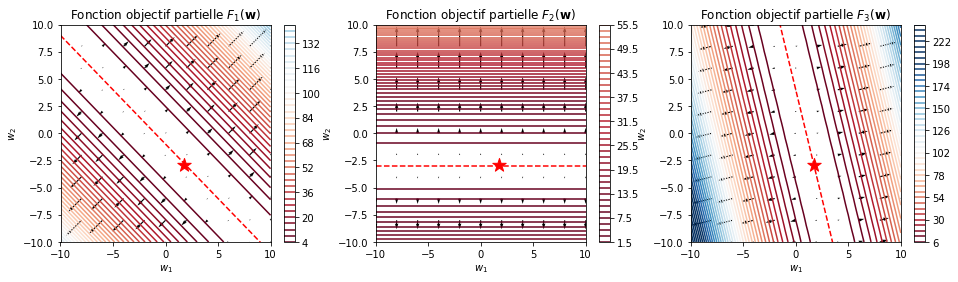

In [10]:
def exemple_quad_objectif_partiel(w, i): 
    return (x[i,:] @ w - y[i]) ** 2 / len(y)

def exemple_quad_gradient_partiel(w, i): 
    return 2*(x[i, :] @ w - y[i]) * x[i, :] / len(y)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i in range(3):
    aidecours.show_2d_vector_field(lambda w: exemple_quad_gradient_partiel(w, i), -10, 10, 2, ax=axes[i])
    aidecours.show_2d_function(lambda w: exemple_quad_objectif_partiel(w, i), -10, 10, .5, ax=axes[i], vmin=10, vmax=200)
    plt.plot([-10, 10], (y[i]-np.array([-10, 10])*x[i,0])/x[i,1], 'r--' )
    plt.scatter(*w_opt, s=200, marker='*', c='r')
    plt.title('Fonction objectif partielle $F_%d(\mathbf{w})$' % (i+1)); plt.xlabel('$w_1$'); plt.ylabel('$w_2$')
CB()

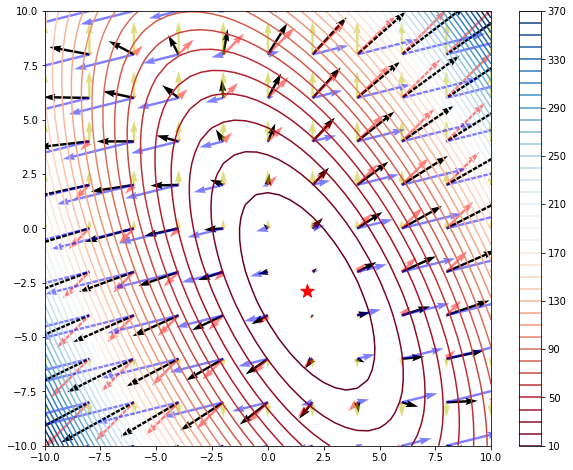

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
aidecours.show_2d_function(exemple_quad_objectif, -10, 10, .5)
plt.scatter(*w_opt, s=200, marker='*', c='r'); CB()
aidecours.show_2d_vector_field(exemple_quad_gradient, -10, 10, 2, scale=200) 
for i, c in enumerate('ryb'):
    aidecours.show_2d_vector_field(lambda w: 2*exemple_quad_gradient_partiel(w, i), -10, 10, 2, color=c, scale=200, alpha=.5)
  

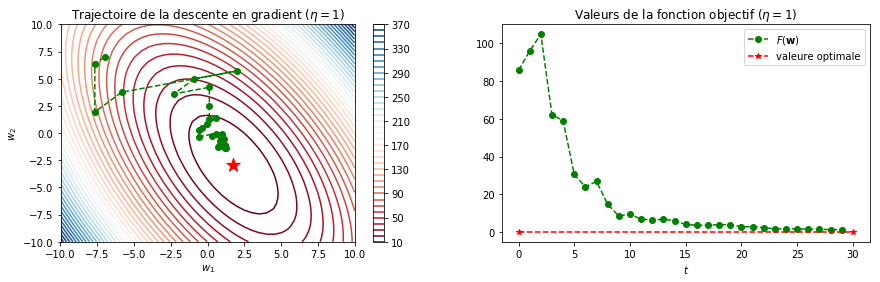

In [12]:
# Paramètres de la descente en gradient
eta = 1 #0.4      # taille du pas
nb_iter = 30       # nombre d'itérations
w_init  = (-7,7)   # coordonnées initiales de la descente en gradient
# w_init = 20*(np.random.rand(2)-.5) # Décommenter pour initialiser aléatoirement

# Descente en gradient
def exemple_quad_descente_de_gradient_stochastique(eta, nb_iter, w_init, seed=2):
    np.random.seed(seed)
    w_list = np.ones((nb_iter, 2)) * np.array(w_init)
    for t in range(1, nb_iter):
        i = np.random.randint(len(y))
        grad = exemple_quad_gradient_partiel(w_list[t-1], i)   # calcul du gradient
        w_list[t] = w_list[t-1] - eta/sqrt(t)*grad   # mise à jour du vecteur de poids
    return w_list

fig, axes = plt.subplots(1, 2, figsize=(14.5, 4))
w_list = exemple_quad_descente_de_gradient_stochastique(eta, nb_iter, w_init)
graph_quad_trajectoire(w_list, eta, w_opt, axes[0])
graph_quad_valeurs_objectif(w_list, eta, w_opt, axes[1])
CB()

## Descente en gradient stochastique avec momentum

#### Algorithme (pour un *pas de gradient* $\eta$, une vélocité $\alpha$ et un nombre d'itérations $T$)  
* Initialiser $\zbf_0 \in \Rbb^d$ aléatoirement
* $\vbf_0 = 0$
* Pour $t$ de $1$ à $T$:
    * Choisir aléatoirement $i \in \{1,\ldots, n\}$
    * $\gbf_t = \nabla F_i(\zbf_{t-1})$
    * $\vbf_t = \alpha \, \vbf_{t-1} -  \dfrac{\eta}{\sqrt t}\, \gbf_t$
    * $\zbf_t = \zbf_{t-1} + \vbf_t$
    
* Retourner $\zbf_T$

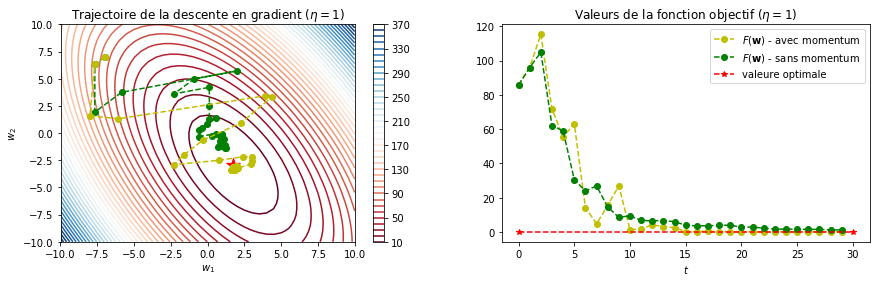

In [13]:
# Paramètres de la descente en gradient
eta = 1 #0.4      # taille du pas
alpha = .5
nb_iter = 30       # nombre d'itérations
w_init  = (-7,7)   # coordonnées initiales de la descente en gradient
# w_init = 20*(np.random.rand(2)-.5) # Décommenter pour initialiser aléatoirement

# Descente en gradient
def exemple_quad_descente_de_gradient_stochastique(eta, alpha, nb_iter, w_init, seed=2):
    np.random.seed(seed)
    w_list = np.ones((nb_iter, 2)) * np.array(w_init)
    velocite = 0
    for t in range(1, nb_iter):
        i = np.random.randint(len(y))
        grad = exemple_quad_gradient_partiel(w_list[t-1], i)   # calcul du gradient
        velocite = alpha*velocite - eta/sqrt(t)*grad 
        w_list[t] = w_list[t-1] + velocite   # mise à jour du vecteur de poids
    return w_list

def graph_quad_trajectoire_comparee(w_list_1, w_list_2,  eta, w_opt, ax=None):
    aidecours.show_2d_function(exemple_quad_objectif, -10, 10, .5, ax=ax)
    plt.scatter(*w_opt, s=200, marker='*', c='r')
    plt.plot(w_list_1[:,0], w_list_1[:,1], 'o--', c='g')
    plt.plot(w_list_2[:,0], w_list_2[:,1], 'o--', c='y')
    plt.title(f'Trajectoire de la descente en gradient ($\eta={eta}$)'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$')

fig, axes = plt.subplots(1, 2, figsize=(14.5, 4))
w_list_1 = exemple_quad_descente_de_gradient_stochastique(eta, 0, nb_iter, w_init)
w_list_2 = exemple_quad_descente_de_gradient_stochastique(eta, alpha, nb_iter, w_init)
graph_quad_trajectoire_comparee(w_list_1, w_list_2, eta, w_opt, axes[0])
aidecours.set_current_axes(axes[1])
cost_list = [exemple_quad_objectif(w) for w in w_list_2]
plt.plot(cost_list, 'o--', c='y', label='$F(\mathbf{w})$ - avec momentum')
graph_quad_valeurs_objectif(w_list_1, eta, w_opt, label='$F(\mathbf{w})$ - sans momentum')
CB()

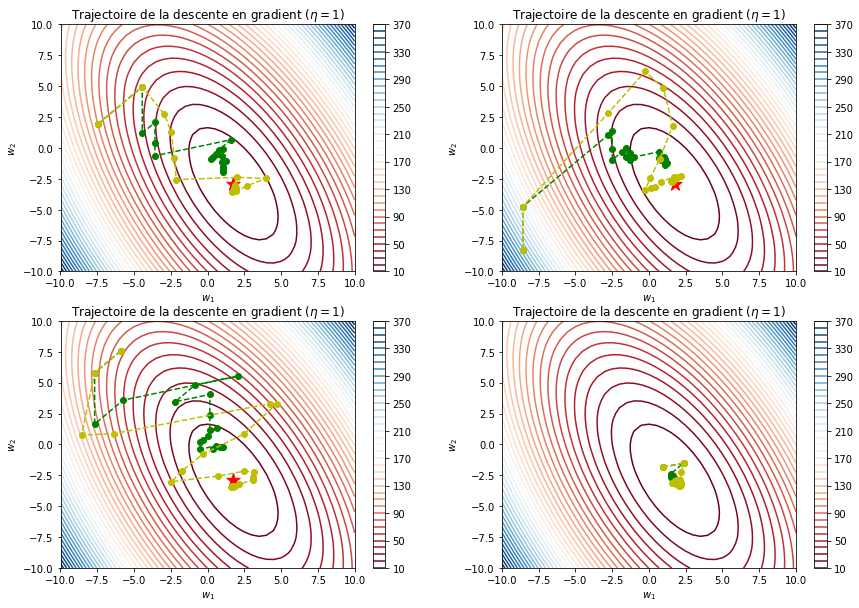

In [14]:
# Paramètres de la descente en gradient
eta = 1       # taille du pas
nb_iter = 20       # nombre d'itérations

fig, axes = plt.subplots(2, 2, figsize=(14.5, 10))

for i, ax in enumerate(axes.flatten()):
    w_init = 20*(np.random.rand(2)-.5) # Décommenter pour initialiser aléatoirement
    w_list_1 = exemple_quad_descente_de_gradient_stochastique(eta, 0, nb_iter, w_init, seed=i)
    w_list_2 = exemple_quad_descente_de_gradient_stochastique(eta, .5, nb_iter, w_init, seed=i)
    graph_quad_trajectoire_comparee(w_list_1, w_list_2, eta, w_opt, ax)